<a href="https://colab.research.google.com/github/MHusni1604/Pengantar-Anlisis-Data-Panel/blob/main/Tugas_Minggu_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1

## Library

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
df = pd.read_excel("https://github.com/MHusni1604/Pengantar-Anlisis-Data-Panel/raw/main/Dataset/Panel%20Dataset.xlsx")
df.head()

,Provinsi,Tahun,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
0,ACEH,2016,14.11,136843.82,38.15,16.73,9.36
1,ACEH,2017,18.90,145806.92,23.19,16.89,9.42
2,ACEH,2018,16.80,155910.98,18.32,15.97,9.46
3,SUMATERA UTARA,2016,10.08,626062.91,47.08,10.35,9.46
4,SUMATERA UTARA,2017,13.10,684634.43,27.10,10.22,9.55


In [ ]:
df.set_index(['Provinsi ', 'Tahun'], inplace=True)
df.head()

Prevalensi Balita Gizi Kurang (0-59 Bulan)       PDRB  \
Provinsi       Tahun                                                          
ACEH           2016                                        14.11  136843.82   
               2017                                        18.90  145806.92   
               2018                                        16.80  155910.98   
SUMATERA UTARA 2016                                        10.08  626062.91   
               2017                                        13.10  684634.43   

                      Imunisasi Dasar  Presentasi Miskin  Rata Lama Pendidikan  
Provinsi       Tahun                                                            
ACEH           2016             38.15              16.73                  9.36  
               2017             23.19              16.89                  9.42  
               2018             18.32              15.97                  9.46  
SUMATERA UTARA 2016             47.08              10.35                  9.46  
               2017             27.10              10.22                  9.55

## Statsitik Deskriptif

<Figure size 1000x600 with 0 Axes>

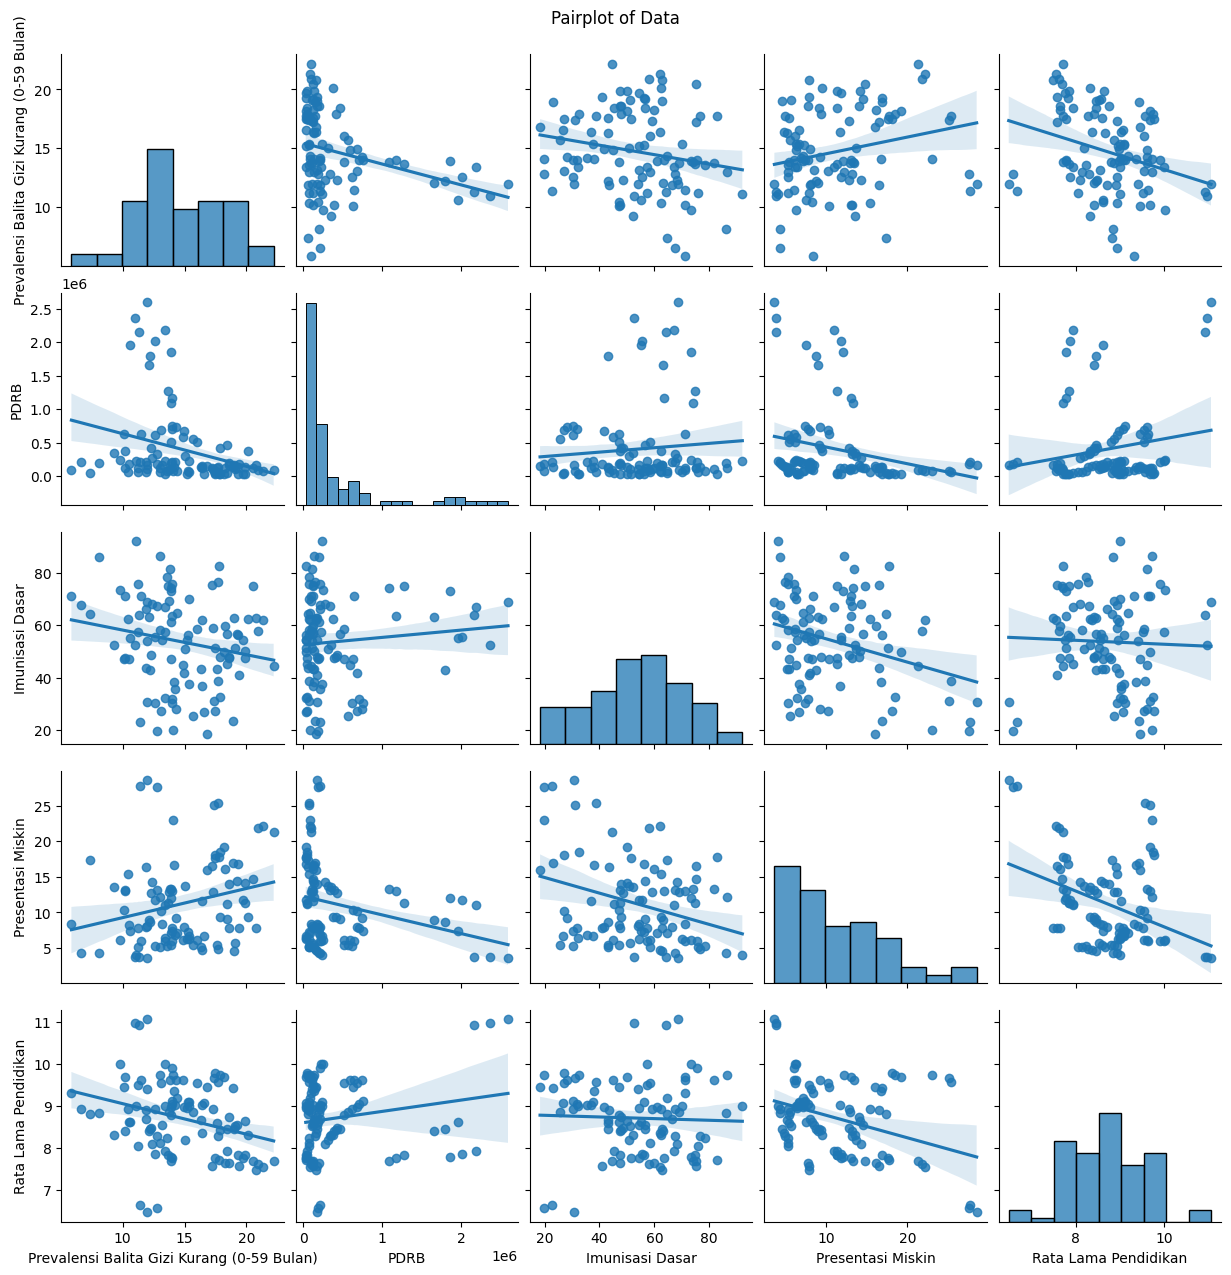

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, kind='reg')
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

In [ ]:
df.describe(include='all')

,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,14.726961,4.053376e+05,53.710392,11.210882,8.713824
std,3.489348,5.791373e+05,16.939769,5.947272,0.866379
min,5.860000,2.915060e+04,18.320000,3.570000,6.480000
25%,12.225000,9.231789e+04,43.180000,6.335000,8.107500
50%,14.050000,1.691676e+05,54.765000,9.390000,8.765000
75%,17.697500,4.184412e+05,65.972500,14.252500,9.347500
max,22.200000,2.592607e+06,92.100000,28.540000,11.060000


## Analisis Cross-Sectional

In [ ]:
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                       0.180
Model:                                                    OLS   Adj. R-squared:                  0.146
Method:                                         Least Squares   F-statistic:                     5.310
Date:                                        Wed, 02 Apr 2025   Prob (F-statistic):           0.000656
Time:                                                11:12:48   Log-Likelihood:                -261.60
No. Observations:                                         102   AIC:                             533.2
Df Residuals:                                              97   BIC:                             546.3
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust            

## Analisis Time Series

Text(0.5, 0, 'Tahun')

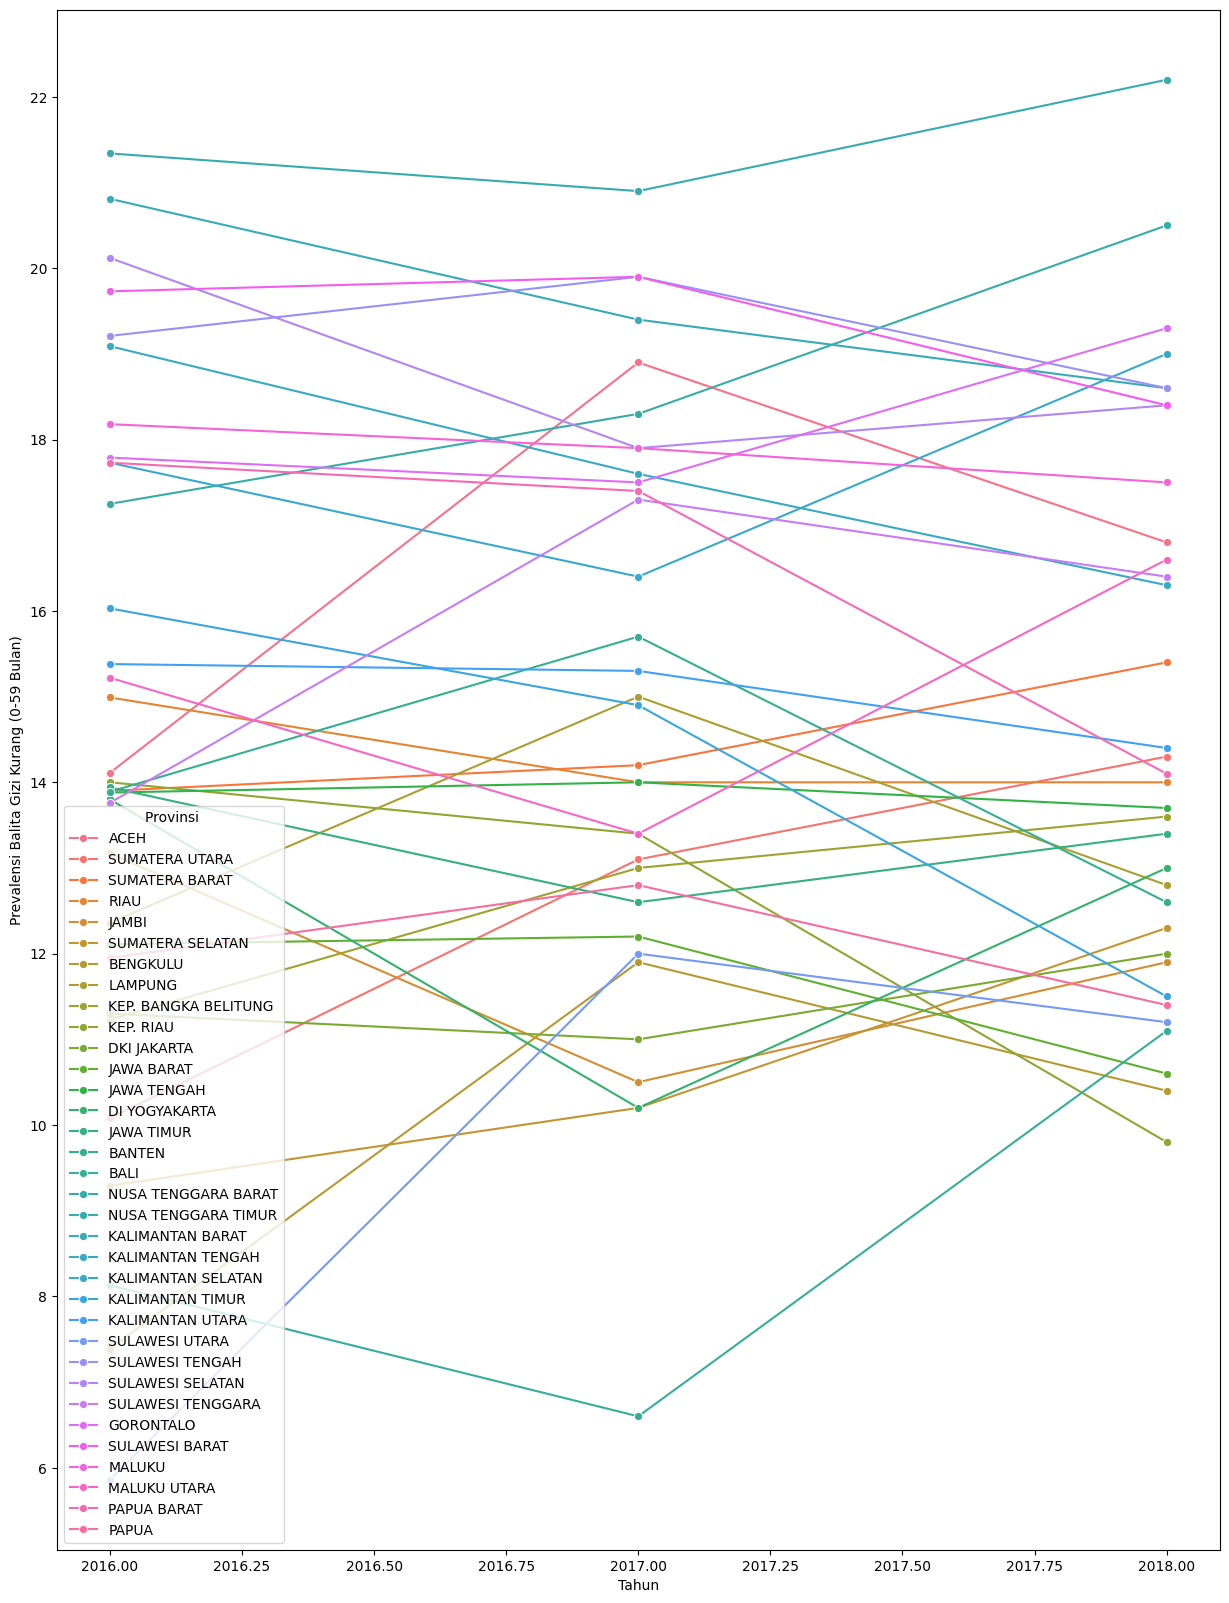

In [ ]:
plt.figure(figsize=(15, 20))
sns.lineplot(data=df.reset_index(), x='Tahun', y='Prevalensi Balita Gizi Kurang (0-59 Bulan)', hue='Provinsi ', marker='o')
plt.xlabel('Tahun')

# Tugas 2

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

In [ ]:
df = pd.read_excel("/content/Tugas Data Panel Baru.xlsx")
df = df.set_index(['Provinsi ', 'Tahun'])  # Menjadikan data panel dengan indeks ganda

df.head()

Prevalensi Balita Gizi Kurang (0-59 Bulan)       PDRB  \
Provinsi       Tahun                                                          
ACEH           2016                                        14.11  136843.82   
               2017                                        18.90  145806.92   
               2018                                        16.80  155910.98   
SUMATERA UTARA 2016                                        10.08  626062.91   
               2017                                        13.10  684634.43   

                      Imunisasi Dasar  Presentasi Miskin  Rata Lama Pendidikan  
Provinsi       Tahun                                                            
ACEH           2016             38.15              16.73                  9.36  
               2017             23.19              16.89                  9.42  
               2018             18.32              15.97                  9.46  
SUMATERA UTARA 2016             47.08              10.35                  9.46  
               2017             27.10              10.22                  9.55

In [ ]:
df.describe()

,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,14.726961,4.053376e+05,53.710392,11.210882,8.713824
std,3.489348,5.791373e+05,16.939769,5.947272,0.866379
min,5.860000,2.915060e+04,18.320000,3.570000,6.480000
25%,12.225000,9.231789e+04,43.180000,6.335000,8.107500
50%,14.050000,1.691676e+05,54.765000,9.390000,8.765000
75%,17.697500,4.184412e+05,65.972500,14.252500,9.347500
max,22.200000,2.592607e+06,92.100000,28.540000,11.060000


In [ ]:
# Menentukan variabel independen dan dependen
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

# Model Fixed Effects untuk data panel
model = PanelOLS(y, X, entity_effects=True,)
results = model.fit()

# Menampilkan ringkasan hasil regresi
print(results.summary)


                                      PanelOLS Estimation Summary                                       
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.0509
Estimator:                                           PanelOLS   R-squared (Between):             -2.5097
No. Observations:                                         102   R-squared (Within):               0.0509
Date:                                        Mon, Mar 03 2025   R-squared (Overall):             -2.0490
Time:                                                03:40:47   Log-likelihood                    84.891
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      0.8586
Entities:                                                  34   P-value                           0.4937
Avg Obs:                                               

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro  # Uji normalitas dari SciPy

residuals = results.resids

# --- 1. Uji Multikolinearitas (VIF) ---
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# --- 2. Uji Heteroskedastisitas (Breusch-Pagan) ---
bp_test = het_breuschpagan(residuals, X)
bp_p_value = bp_test[1]  # p-value

# --- 3. Uji Autokorelasi (Durbin-Watson) ---
dw_stat = durbin_watson(residuals)

# --- 4. Uji Normalitas Residual (Shapiro-Wilk) ---
shapiro_test = shapiro(residuals)
shapiro_p_value = shapiro_test[1]

# --- Cetak Hasil Uji Asumsi ---
print("\nUji Multikolinearitas (VIF):")
print(vif_data)

print("\nUji Heteroskedastisitas (Breusch-Pagan Test):")
print(f"p-value: {bp_p_value} (H0: Homoskedastisitas)")

print("\nUji Autokorelasi (Durbin-Watson Test):")
print(f"Durbin-Watson Statistic: {dw_stat} (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)")

print("\nUji Normalitas Residual (Shapiro-Wilk Test):")
print(f"p-value: {shapiro_p_value} (H0: Residual berdistribusi normal)")

# --- Kesimpulan Berdasarkan Hasil Uji ---
print("\nKESIMPULAN UJI ASUMSI:")
if any(vif_data["VIF"] > 10):
    print("- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.")
else:
    print("- Tidak ada indikasi multikolinearitas (VIF semua variabel < 10).")

if bp_p_value < 0.05:
    print("- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.")
else:
    print("- Tidak terdapat heteroskedastisitas (p-value > 0.05), asumsi homoskedastisitas terpenuhi.")

if 1.5 < dw_stat < 2.5:
    print("- Tidak ada autokorelasi (Durbin-Watson berada dalam rentang 1.5 - 2.5).")
else:
    print("- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).")

if shapiro_p_value < 0.05:
    print("- Residual tidak berdistribusi normal (p-value < 0.05).")
else:
    print("- Residual berdistribusi normal (p-value > 0.05).")



Uji Multikolinearitas (VIF):
               Variabel         VIF
0                 const  176.217719
1                  PDRB    1.080741
2       Imunisasi Dasar    1.143682
3     Presentasi Miskin    1.362729
4  Rata Lama Pendidikan    1.202381

Uji Heteroskedastisitas (Breusch-Pagan Test):
p-value: 0.007058545242875763 (H0: Homoskedastisitas)

Uji Autokorelasi (Durbin-Watson Test):
Durbin-Watson Statistic: 2.569768691781664 (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)

Uji Normalitas Residual (Shapiro-Wilk Test):
p-value: 0.011919930731528985 (H0: Residual berdistribusi normal)

KESIMPULAN UJI ASUMSI:
- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.
- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.
- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).
- Residual tidak berdistribusi normal (p-value < 0.05).


# Tugas 3


In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from linearmodels.panel import RandomEffects
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from linearmodels.panel import compare
from linearmodels.panel import PanelOLS

ModuleNotFoundError: No module named 'linearmodels'

In [ ]:
df = pd.read_excel("/content/Tugas Data Panel Baru.xlsx")
df = df.set_index(['Provinsi ', 'Tahun'])

In [ ]:
# Menentukan variabel independen dan dependen
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

# Model Fixed Effects untuk data panel
model = RandomEffects(y, X)
results = model.fit()

# Menampilkan ringkasan hasil regresi
print(results.summary)


                                    RandomEffects Estimation Summary                                    
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.0812
Estimator:                                      RandomEffects   R-squared (Between):              0.2024
No. Observations:                                         102   R-squared (Within):               0.0145
Date:                                        Mon, Mar 03 2025   R-squared (Overall):              0.1775
Time:                                                04:24:25   Log-likelihood                   -186.63
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      2.1431
Entities:                                                  34   P-value                           0.0812
Avg Obs:                                               

In [ ]:
# Menentukan variabel independen dan dependen
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

# Model Fixed Effects untuk data panel
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit()

# Menampilkan ringkasan hasil regresi
print(results.summary)

                                      PanelOLS Estimation Summary                                       
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.0464
Estimator:                                           PanelOLS   R-squared (Between):             -15.581
No. Observations:                                         102   R-squared (Within):              -0.3045
Date:                                        Mon, Mar 03 2025   R-squared (Overall):             -13.558
Time:                                                04:25:09   Log-likelihood                   -165.63
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      0.7541
Entities:                                                  34   P-value                           0.5591
Avg Obs:                                               

In [ ]:
df = pd.read_excel("/content/Tugas Data Panel Baru.xlsx")
df = df.set_index(['Provinsi ', 'Tahun'])
df.describe()

,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,14.726961,4.053376e+05,53.710392,11.210882,8.713824
std,3.489348,5.791373e+05,16.939769,5.947272,0.866379
min,5.860000,2.915060e+04,18.320000,3.570000,6.480000
25%,12.225000,9.231789e+04,43.180000,6.335000,8.107500
50%,14.050000,1.691676e+05,54.765000,9.390000,8.765000
75%,17.697500,4.184412e+05,65.972500,14.252500,9.347500
max,22.200000,2.592607e+06,92.100000,28.540000,11.060000


In [ ]:
df = pd.read_excel("/content/Tugas Data Panel Baru.xlsx")
df.rename(columns={
    'Provinsi ': 'Provinsi',
    'Prevalensi Balita Gizi Kurang (0-59 Bulan)': 'Prevalensi',
    'Imunisasi Dasar': 'Imunisasi',
    'Presentasi Miskin': 'Kemiskinan',
    'Rata Lama Pendidikan': 'Pendidikan'
}, inplace=True)


# Model dengan efek acak (Random Intercept)
model_mixed = smf.mixedlm("Prevalensi ~ PDRB + Imunisasi + Kemiskinan + Pendidikan", df, groups=df["Tahun"])
result_mixed = model_mixed.fit()

# Print ringkasan hasil estimasi
print("Random Intercept Model")
print(result_mixed.summary())

Random Intercept Model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Prevalensi
No. Observations: 102     Method:             REML      
No. Groups:       3       Scale:              10.4004   
Min. group size:  34      Log-Likelihood:     -280.3203 
Max. group size:  34      Converged:          Yes       
Mean group size:  34.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     25.436    4.238  6.002 0.000 17.130 33.742
PDRB          -0.000    0.000 -2.334 0.020 -0.000 -0.000
Imunisasi     -0.035    0.020 -1.726 0.084 -0.075  0.005
Kemiskinan     0.024    0.063  0.382 0.703 -0.099  0.148
Pendidikan    -0.982    0.406 -2.418 0.016 -1.778 -0.186
Group Var      0.000                                    



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# Log-likelihood model dengan prediktor
ll_model = result_mixed.llf

# Model null (hanya intercept)
model_null = smf.mixedlm("Prevalensi ~ 1", df, groups=df["Tahun"]).fit()
ll_null = model_null.llf

# Pseudo R-squared (McFadden’s R²)
pseudo_r2 = 1 - (ll_model / ll_null)
print(f"McFadden’s Pseudo R²: {pseudo_r2:.4f}")

McFadden’s Pseudo R²: -0.0312


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

In [ ]:
# 7️⃣ Uji Asumsi Model
residuals = result_mixed.resid

# Uji Multikolinearitas (VIF)
X = df[["PDRB", "Imunisasi", "Kemiskinan", "Pendidikan"]]
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nUji Multikolinearitas (VIF):")
print(vif_data)

# Uji Heteroskedastisitas (Breusch-Pagan Test)
X_const = sm.add_constant(X)  # Tambahkan konstanta untuk uji Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_const)
bp_p_value = bp_test[1]
print("\nUji Heteroskedastisitas (Breusch-Pagan Test):")
print(f"p-value: {bp_p_value} (H0: Homoskedastisitas)")

# Uji Normalitas Residual (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
shapiro_p_value = shapiro_test[1]
print("\nUji Normalitas Residual (Shapiro-Wilk Test):")
print(f"p-value: {shapiro_p_value} (H0: Residual berdistribusi normal)")

# Uji Autokorelasi (Durbin-Watson Test)
dw_stat = durbin_watson(residuals)
print("\nUji Autokorelasi (Durbin-Watson Test):")
print(f"Durbin-Watson Statistic: {dw_stat} (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)")

# Kesimpulan Uji Asumsi
print("\nKESIMPULAN UJI ASUMSI:")
if any(vif_data["VIF"] > 10):
    print("- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.")
else:
    print("- Tidak ada indikasi multikolinearitas (VIF semua variabel < 10).")

if bp_p_value < 0.05:
    print("- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.")
else:
    print("- Tidak terdapat heteroskedastisitas (p-value > 0.05), asumsi homoskedastisitas terpenuhi.")

if shapiro_p_value < 0.05:
    print("- Residual tidak berdistribusi normal (p-value < 0.05).")
else:
    print("- Residual berdistribusi normal (p-value > 0.05).")

if 1.5 < dw_stat < 2.5:
    print("- Tidak ada autokorelasi (Durbin-Watson berada dalam rentang 1.5 - 2.5).")
else:
    print("- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).")



Uji Multikolinearitas (VIF):
     Variabel        VIF
0        PDRB   1.615317
1   Imunisasi  10.084172
2  Kemiskinan   4.195488
3  Pendidikan  15.309829

Uji Heteroskedastisitas (Breusch-Pagan Test):
p-value: 0.0016439660205390502 (H0: Homoskedastisitas)

Uji Normalitas Residual (Shapiro-Wilk Test):
p-value: 0.02156433508230587 (H0: Residual berdistribusi normal)

Uji Autokorelasi (Durbin-Watson Test):
Durbin-Watson Statistic: 0.623736989619094 (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)

KESIMPULAN UJI ASUMSI:
- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.
- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.
- Residual tidak berdistribusi normal (p-value < 0.05).
- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).


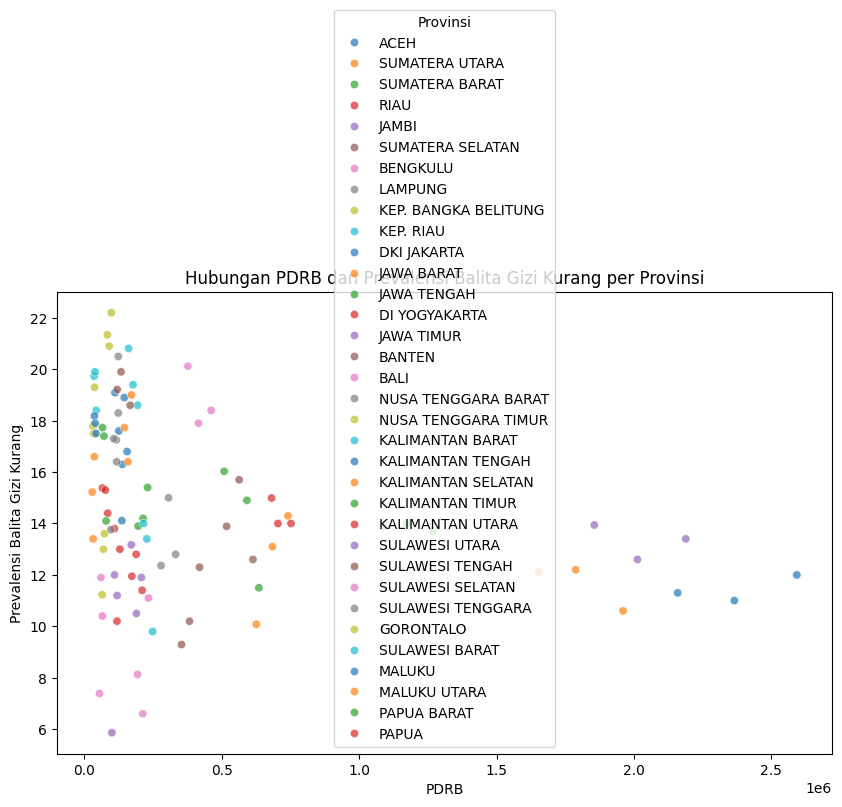

Random Intercept Model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Prevalensi
No. Observations: 102     Method:             REML      
No. Groups:       34      Scale:              2.3948    
Min. group size:  3       Log-Likelihood:     -245.7157 
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     24.192    6.442  3.755 0.000 11.565 36.818
PDRB          -0.000    0.000 -1.490 0.136 -0.000  0.000
Imunisasi     -0.028    0.017 -1.693 0.090 -0.061  0.004
Kemiskinan     0.019    0.097  0.192 0.848 -0.172  0.209
Pendidikan    -0.871    0.658 -1.324 0.185 -2.160  0.418
Group Var      8.661    1.893                           



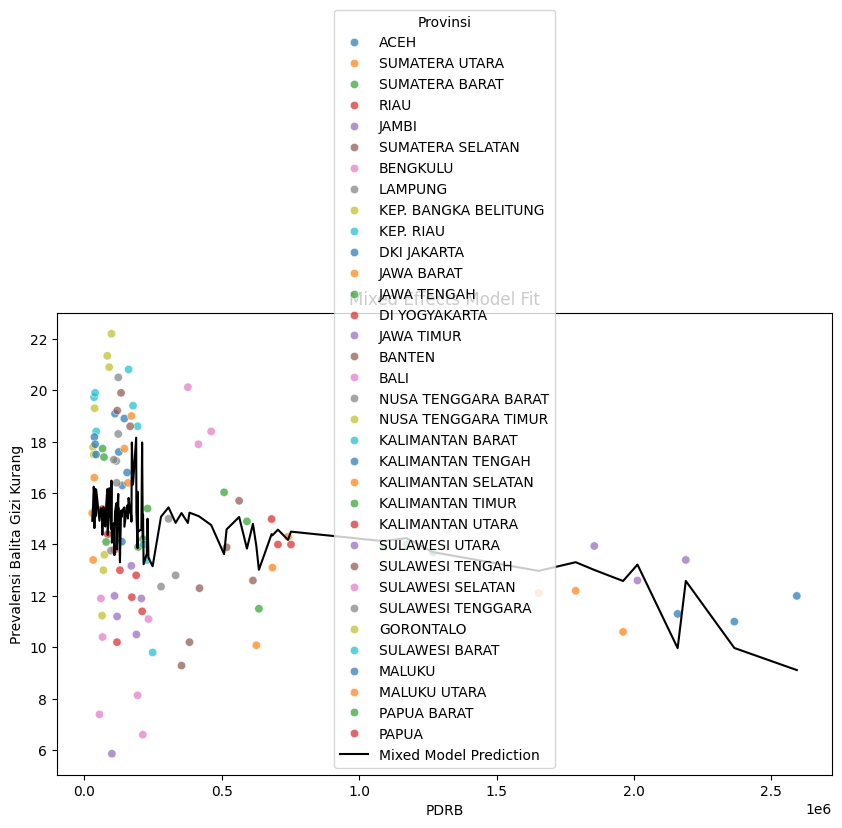

In [ ]:
# 2️⃣ Plot Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PDRB"], y=df["Prevalensi"], hue=df["Provinsi"], palette='tab10', alpha=0.7)
plt.xlabel("PDRB")
plt.ylabel("Prevalensi Balita Gizi Kurang")
plt.title("Hubungan PDRB dan Prevalensi Balita Gizi Kurang per Provinsi")
plt.legend(title="Provinsi")
plt.show()

# 3️⃣ Mixed Effects Model dengan efek acak per kelompok
model_mixed = smf.mixedlm("Prevalensi ~ PDRB + Imunisasi + Kemiskinan + Pendidikan", df, groups=df["Provinsi"])
result_mixed = model_mixed.fit()

# 4️⃣ Print hasil estimasi
print("Random Intercept Model")
print(result_mixed.summary())

# 5️⃣ Visualisasi hasil regresi
df['y_pred'] = result_mixed.predict()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PDRB'], y=df['Prevalensi'], hue=df['Provinsi'], alpha=0.7, palette='tab10')
sns.lineplot(x=df['PDRB'], y=df['y_pred'], color='black', label="Mixed Model Prediction")
plt.xlabel("PDRB")
plt.ylabel("Prevalensi Balita Gizi Kurang")
plt.title("Mixed Effects Model Fit")
plt.legend(title="Provinsi")
plt.show()


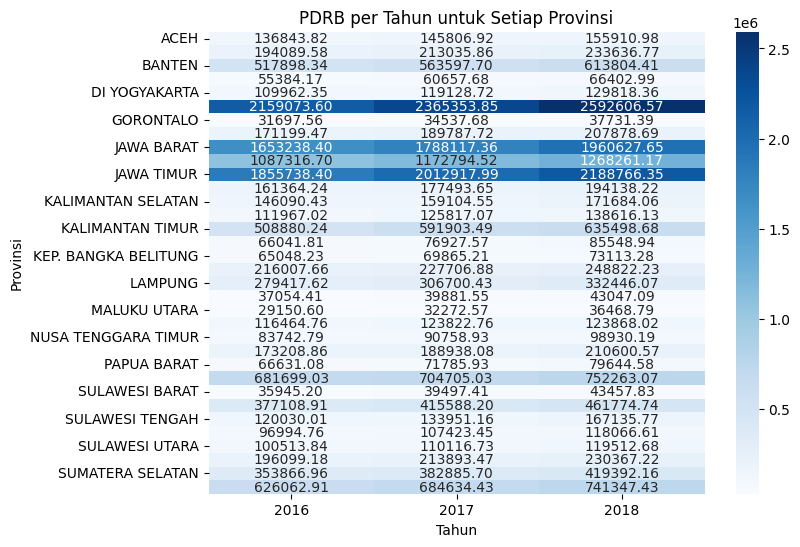

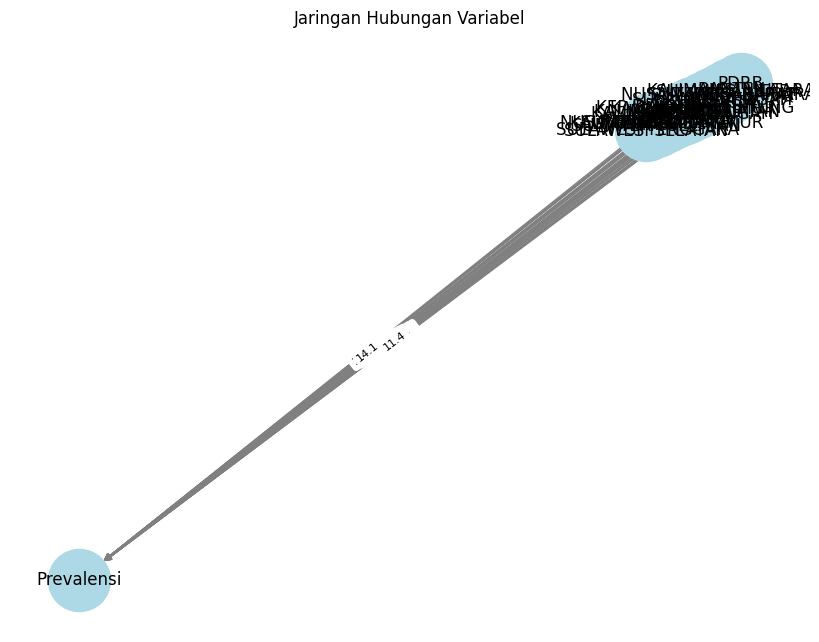


Indeks Lokalisasi PDRB per Provinsi:
 Provinsi
ACEH                    0.010608
BALI                    0.015498
BANTEN                  0.041004
BENGKULU                0.004413
DI YOGYAKARTA           0.008681
DKI JAKARTA             0.172140
GORONTALO               0.002515
JAMBI                   0.013759
JAWA BARAT              0.130658
JAWA TENGAH             0.085341
JAWA TIMUR              0.146511
KALIMANTAN BARAT        0.012892
KALIMANTAN SELATAN      0.011534
KALIMANTAN TENGAH       0.009104
KALIMANTAN TIMUR        0.041996
KALIMANTAN UTARA        0.005527
KEP. BANGKA BELITUNG    0.005032
KEP. RIAU               0.016750
LAMPUNG                 0.022217
MALUKU                  0.002902
MALUKU UTARA            0.002368
NUSA TENGGARA BARAT     0.008808
NUSA TENGGARA TIMUR     0.006614
PAPUA                   0.013853
PAPUA BARAT             0.005274
RIAU                    0.051728
SULAWESI BARAT          0.002876
SULAWESI SELATAN        0.030342
SULAWESI TENGAH         0.01

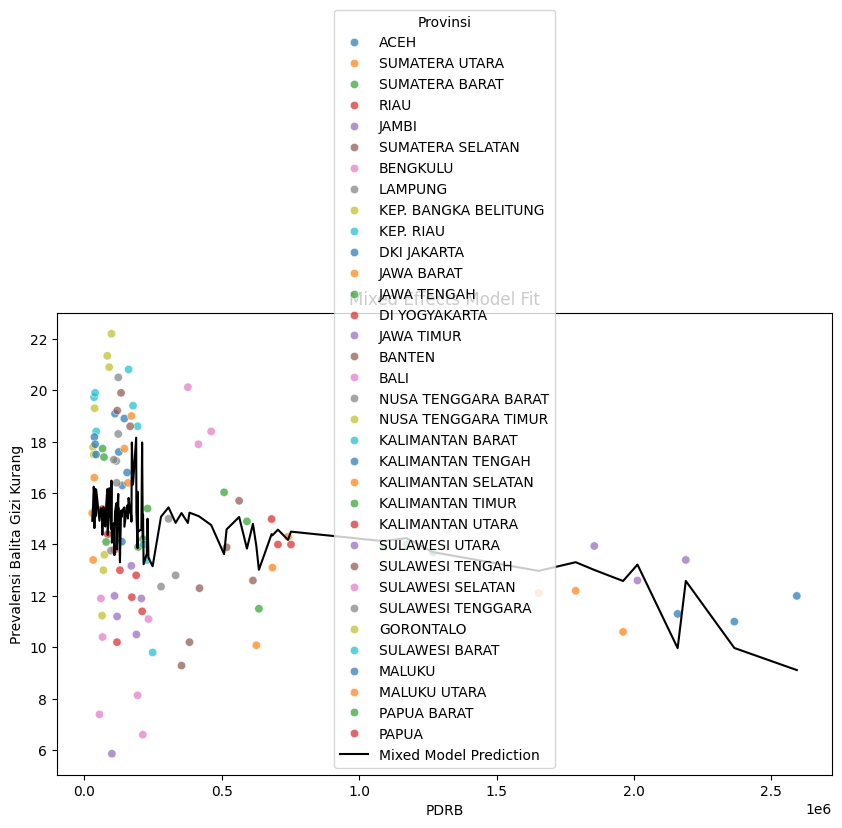

In [ ]:
import networkx as nx

# 2️⃣ Visualisasi Heatmap PDRB
plt.figure(figsize=(8, 6))
heatmap_data = df.pivot(index="Provinsi", columns="Tahun", values="PDRB")
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title("PDRB per Tahun untuk Setiap Provinsi")
plt.xlabel("Tahun")
plt.ylabel("Provinsi")
plt.show()

# 3️⃣ Jaringan Hubungan Antarprovinsi
G = nx.DiGraph()

# Tambahkan node dan edges berdasarkan hubungan antarvariabel
for prov in df["Provinsi"].unique():
    G.add_node(prov)
    for _, row in df[df["Provinsi"] == prov].iterrows():
        G.add_edge(prov, "PDRB", weight=row["PDRB"])
        G.add_edge(prov, "Prevalensi", weight=row["Prevalensi"])

# Plot jaringan
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray")
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=8)
plt.title("Jaringan Hubungan Variabel")
plt.show()

# 4️⃣ Indeks Lokalisasi PDRB
localization_index = df.groupby("Provinsi")["PDRB"].sum() / df["PDRB"].sum()
print("\nIndeks Lokalisasi PDRB per Provinsi:\n", localization_index)

# 5️⃣ Mixed Effects Model dengan efek acak per kelompok
model_mixed = smf.mixedlm("Prevalensi ~ PDRB + Imunisasi + Kemiskinan + Pendidikan", df, groups=df["Provinsi"])
result_mixed = model_mixed.fit()

# Print hasil estimasi
print("Random Intercept Model")
print(result_mixed.summary())

# 6️⃣ Visualisasi hasil regresi
df['y_pred'] = result_mixed.predict()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PDRB'], y=df['Prevalensi'], hue=df['Provinsi'], alpha=0.7, palette='tab10')
sns.lineplot(x=df['PDRB'], y=df['y_pred'], color='black', label="Mixed Model Prediction")
plt.xlabel("PDRB")
plt.ylabel("Prevalensi Balita Gizi Kurang")
plt.title("Mixed Effects Model Fit")
plt.legend(title="Provinsi")
plt.show()


In [ ]:
df = pd.read_excel("/content/Tugas Data Panel Baru.xlsx")
df.rename(columns={
    'Provinsi ': 'Provinsi',
    'Prevalensi Balita Gizi Kurang (0-59 Bulan)': 'Prevalensi',
    'Imunisasi Dasar': 'Imunisasi',
    'Presentasi Miskin': 'Kemiskinan',
    'Rata Lama Pendidikan': 'Pendidikan'
}, inplace=True)

In [ ]:
# Model dengan efek acak (Random Intercept)
model_mixed = smf.mixedlm("Prevalensi ~ PDRB + Imunisasi + Kemiskinan + Pendidikan", df, groups=df["Provinsi"])
result_mixed = model_mixed.fit()

# Print ringkasan hasil estimasi
print("Random Intercept Model")
print(result_mixed.summary())

Random Intercept Model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Prevalensi
No. Observations: 102     Method:             REML      
No. Groups:       34      Scale:              2.3948    
Min. group size:  3       Log-Likelihood:     -245.7157 
Max. group size:  3       Converged:          Yes       
Mean group size:  3.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     24.192    6.442  3.755 0.000 11.565 36.818
PDRB          -0.000    0.000 -1.490 0.136 -0.000  0.000
Imunisasi     -0.028    0.017 -1.693 0.090 -0.061  0.004
Kemiskinan     0.019    0.097  0.192 0.848 -0.172  0.209
Pendidikan    -0.871    0.658 -1.324 0.185 -2.160  0.418
Group Var      8.661    1.893                           



In [ ]:
# Log-likelihood model dengan prediktor
ll_model = result_mixed.llf

# Model null (hanya intercept)
model_null = smf.mixedlm("Prevalensi ~ 1", df, groups=df["Provinsi"]).fit()
ll_null = model_null.llf

# Pseudo R-squared (McFadden’s R²)
pseudo_r2 = 1 - (ll_model / ll_null)
print(f"McFadden’s Pseudo R²: {pseudo_r2:.4f}")

McFadden’s Pseudo R²: -0.0561


In [ ]:
# 7️⃣ Uji Asumsi Model
residuals = result_mixed.resid

# Uji Multikolinearitas (VIF)
X = df[["PDRB", "Imunisasi", "Kemiskinan", "Pendidikan"]]
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nUji Multikolinearitas (VIF):")
print(vif_data)

# Uji Heteroskedastisitas (Breusch-Pagan Test)
X_const = sm.add_constant(X)  # Tambahkan konstanta untuk uji Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_const)
bp_p_value = bp_test[1]
print("\nUji Heteroskedastisitas (Breusch-Pagan Test):")
print(f"p-value: {bp_p_value} (H0: Homoskedastisitas)")

# Uji Normalitas Residual (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
shapiro_p_value = shapiro_test[1]
print("\nUji Normalitas Residual (Shapiro-Wilk Test):")
print(f"p-value: {shapiro_p_value} (H0: Residual berdistribusi normal)")

# Uji Autokorelasi (Durbin-Watson Test)
dw_stat = durbin_watson(residuals)
print("\nUji Autokorelasi (Durbin-Watson Test):")
print(f"Durbin-Watson Statistic: {dw_stat} (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)")

# Kesimpulan Uji Asumsi
print("\nKESIMPULAN UJI ASUMSI:")
if any(vif_data["VIF"] > 10):
    print("- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.")
else:
    print("- Tidak ada indikasi multikolinearitas (VIF semua variabel < 10).")

if bp_p_value < 0.05:
    print("- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.")
else:
    print("- Tidak terdapat heteroskedastisitas (p-value > 0.05), asumsi homoskedastisitas terpenuhi.")

if shapiro_p_value < 0.05:
    print("- Residual tidak berdistribusi normal (p-value < 0.05).")
else:
    print("- Residual berdistribusi normal (p-value > 0.05).")

if 1.5 < dw_stat < 2.5:
    print("- Tidak ada autokorelasi (Durbin-Watson berada dalam rentang 1.5 - 2.5).")
else:
    print("- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).")



Uji Multikolinearitas (VIF):
     Variabel        VIF
0        PDRB   1.615317
1   Imunisasi  10.084172
2  Kemiskinan   4.195488
3  Pendidikan  15.309829

Uji Heteroskedastisitas (Breusch-Pagan Test):
p-value: 0.007385619856977205 (H0: Homoskedastisitas)

Uji Normalitas Residual (Shapiro-Wilk Test):
p-value: 0.05535774901941322 (H0: Residual berdistribusi normal)

Uji Autokorelasi (Durbin-Watson Test):
Durbin-Watson Statistic: 2.4173111751162746 (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)

KESIMPULAN UJI ASUMSI:
- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.
- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.
- Residual berdistribusi normal (p-value > 0.05).
- Tidak ada autokorelasi (Durbin-Watson berada dalam rentang 1.5 - 2.5).


In [ ]:
df["Provinsi_Tahun"] = df["Provinsi"] + "_" + df["Tahun"].astype(str)  # Gabungan Provinsi & Tahun
# Model dengan efek acak (Random Intercept)
model_mixed = smf.mixedlm("Prevalensi ~ PDRB + Imunisasi + Kemiskinan + Pendidikan", df, groups=df["Provinsi_Tahun"])
result_mixed = model_mixed.fit()

# Print ringkasan hasil estimasi
print("Random Intercept Model")
print(result_mixed.summary())

Random Intercept Model
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Prevalensi
No. Observations: 102     Method:             REML      
No. Groups:       102     Scale:              5.2002    
Min. group size:  1       Log-Likelihood:     -280.3203 
Max. group size:  1       Converged:          Yes       
Mean group size:  1.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     25.436    4.239  6.001 0.000 17.128 33.744
PDRB          -0.000    0.000 -2.334 0.020 -0.000 -0.000
Imunisasi     -0.035    0.020 -1.725 0.085 -0.075  0.005
Kemiskinan     0.024    0.063  0.382 0.703 -0.099  0.148
Pendidikan    -0.982    0.406 -2.418 0.016 -1.778 -0.186
Group Var      5.200                                    



/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# Log-likelihood model dengan prediktor
ll_model = result_mixed.llf

# Model null (hanya intercept)
model_null = smf.mixedlm("Prevalensi ~ 1", df, groups=df["Provinsi_Tahun"]).fit()
ll_null = model_null.llf

# Pseudo R-squared (McFadden’s R²)
pseudo_r2 = 1 - (ll_model / ll_null)
print(f"McFadden’s Pseudo R²: {pseudo_r2:.4f}")


McFadden’s Pseudo R²: -0.0312


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# 7️⃣ Uji Asumsi Model
residuals = result_mixed.resid

# Uji Multikolinearitas (VIF)
X = df[["PDRB", "Imunisasi", "Kemiskinan", "Pendidikan"]]
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nUji Multikolinearitas (VIF):")
print(vif_data)

# Uji Heteroskedastisitas (Breusch-Pagan Test)
X_const = sm.add_constant(X)  # Tambahkan konstanta untuk uji Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_const)
bp_p_value = bp_test[1]
print("\nUji Heteroskedastisitas (Breusch-Pagan Test):")
print(f"p-value: {bp_p_value} (H0: Homoskedastisitas)")

# Uji Normalitas Residual (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
shapiro_p_value = shapiro_test[1]
print("\nUji Normalitas Residual (Shapiro-Wilk Test):")
print(f"p-value: {shapiro_p_value} (H0: Residual berdistribusi normal)")

# Uji Autokorelasi (Durbin-Watson Test)
dw_stat = durbin_watson(residuals)
print("\nUji Autokorelasi (Durbin-Watson Test):")
print(f"Durbin-Watson Statistic: {dw_stat} (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)")

# Kesimpulan Uji Asumsi
print("\nKESIMPULAN UJI ASUMSI:")
if any(vif_data["VIF"] > 10):
    print("- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.")
else:
    print("- Tidak ada indikasi multikolinearitas (VIF semua variabel < 10).")

if bp_p_value < 0.05:
    print("- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.")
else:
    print("- Tidak terdapat heteroskedastisitas (p-value > 0.05), asumsi homoskedastisitas terpenuhi.")

if shapiro_p_value < 0.05:
    print("- Residual tidak berdistribusi normal (p-value < 0.05).")
else:
    print("- Residual berdistribusi normal (p-value > 0.05).")

if 1.5 < dw_stat < 2.5:
    print("- Tidak ada autokorelasi (Durbin-Watson berada dalam rentang 1.5 - 2.5).")
else:
    print("- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).")



Uji Multikolinearitas (VIF):
     Variabel        VIF
0        PDRB   1.615317
1   Imunisasi  10.084172
2  Kemiskinan   4.195488
3  Pendidikan  15.309829

Uji Heteroskedastisitas (Breusch-Pagan Test):
p-value: 0.0016439667822494106 (H0: Homoskedastisitas)

Uji Normalitas Residual (Shapiro-Wilk Test):
p-value: 0.021564337452583408 (H0: Residual berdistribusi normal)

Uji Autokorelasi (Durbin-Watson Test):
Durbin-Watson Statistic: 0.6237370040248907 (Nilai mendekati 2 menunjukkan tidak ada autokorelasi)

KESIMPULAN UJI ASUMSI:
- Terindikasi multikolinearitas karena terdapat variabel dengan VIF > 10.
- Terdapat heteroskedastisitas dalam model (p-value < 0.05), asumsi homoskedastisitas tidak terpenuhi.
- Residual tidak berdistribusi normal (p-value < 0.05).
- Terdapat indikasi autokorelasi (Durbin-Watson berada di luar rentang 1.5 - 2.5).
